# Heart Disease Prediction

In this project, I conducted Exploratory Data Analysis (EDA) on a heart disease dataset and developed a predictive model to effectively assess an individual's risk of heart disease based on their medical and biographic information.

The model uses various data points, including Age, Gender, Smoking habits, Disabilities, and other lifestyle factors, to evaluate heart disease risk. This tool could be valuable for healthcare professionals in determining a patient's likelihood of heart disease.

I utilized packages such as pandas, matplotlib, seaborn, category_encoders, LazyPredict, and sci-kit-learn for both exploratory analysis and model building. Additionally, I created a dashboard to visualize the distributions of the data effectively.

[Link to Dashboard](https://public.tableau.com/views/HeartDiseaseDashboard_17218783769710/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)\
[Link to Data Source](https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction*)

### Imports

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, f1_score, confusion_matrix

### Load Dataset

In [60]:
# Load Data
data = pd.read_csv("heart_disease_dataset.csv")
data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,None,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,None,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,None,6,No,Yes,No,2,183,Yes,Asymptomatic,0


### Initial EDA

In [61]:
data.shape

(1000, 16)

In [62]:
# Check Null Values
data.isna().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [63]:
data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,52.29,249.94,135.28,79.20,4.53,5.65,134.94,0.39
std,15.73,57.91,26.39,11.49,2.93,2.83,36.70,0.49
min,25.00,150.00,90.00,60.00,0.00,1.00,70.00,0.00
25%,39.00,200.00,112.75,70.00,2.00,3.00,104.00,0.00
50%,52.00,248.00,136.00,79.00,4.50,6.00,135.00,0.00
75%,66.00,299.00,159.00,89.00,7.00,8.00,167.00,1.00
max,79.00,349.00,179.00,99.00,9.00,10.00,199.00,1.00


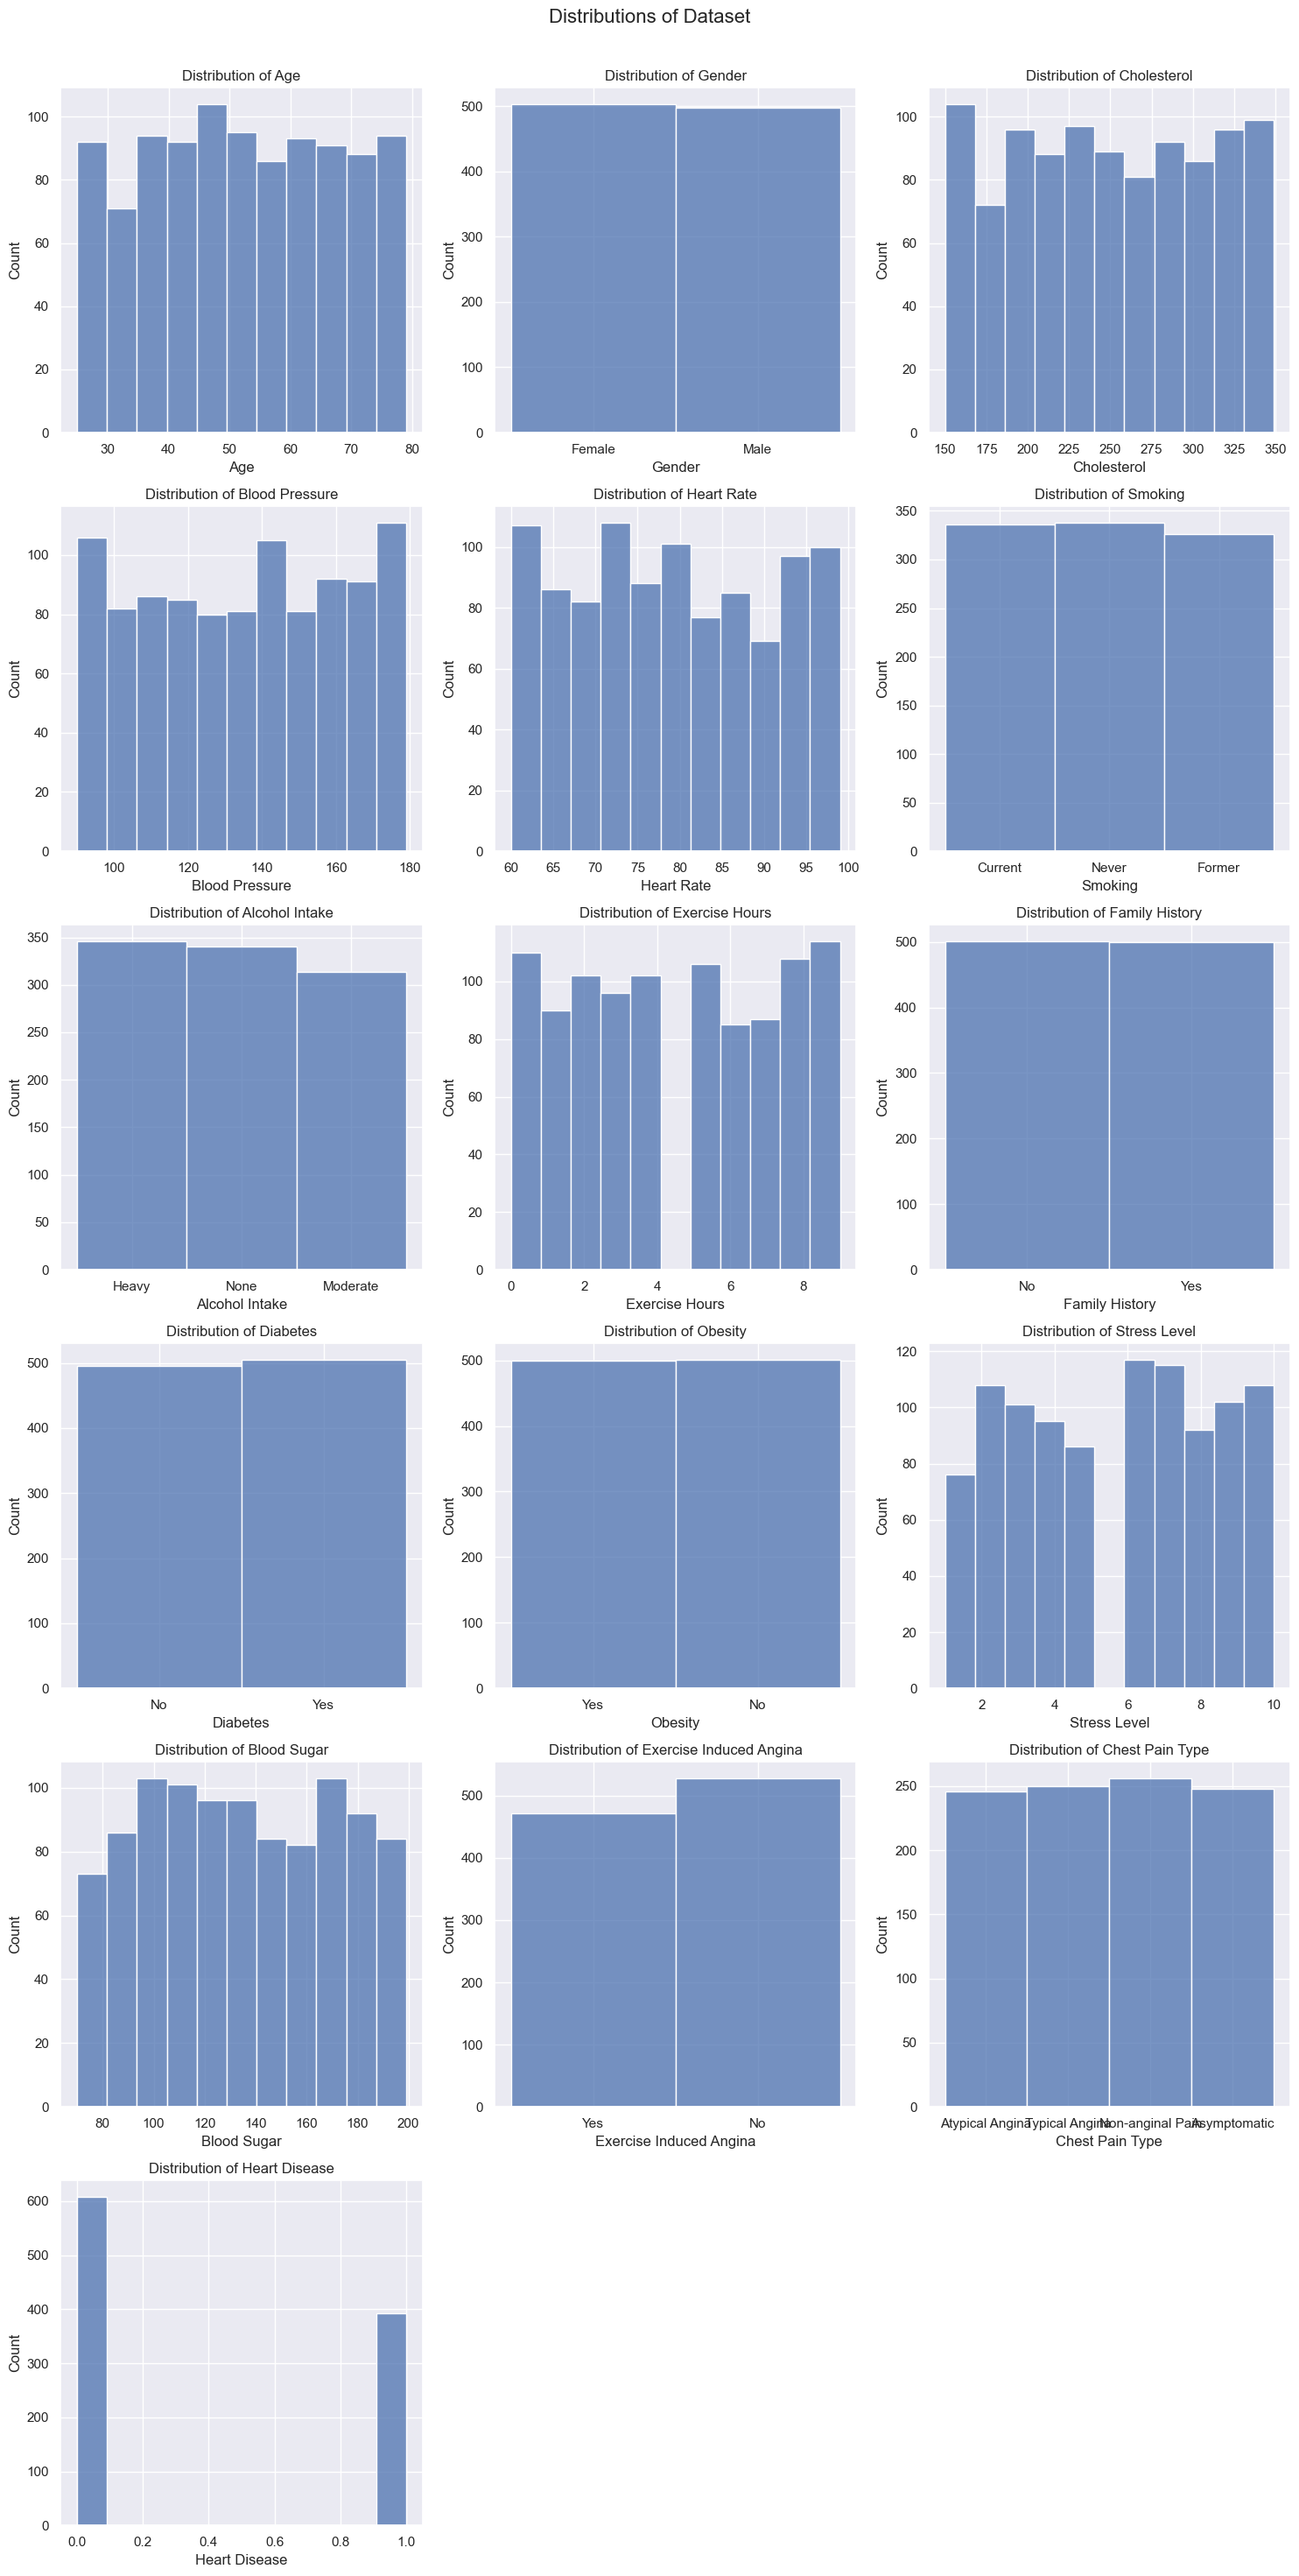

In [64]:
num_columns = len(data.columns)

# Set Dimensions of the plot
fig, axes = plt.subplots(nrows=(num_columns + 2) // 3, ncols=3, figsize=(15, 5 * ((num_columns + 2) // 3)))

axes = axes.flatten()

# Populate distributions for each plot 
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Distributions of Dataset", fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()

### Machine Learning: 
##### Building a Predictive Classification Model

Before building a machine learning (ML) model, it is crucial to ensure that all fields provided to the model are numeric. For this purpose, I encoded variables using manual encoding with the .replace() function for fields with a limited number of unique values. Additionally, I employed the Category Encoders library to encode the "Chest Pain Type" variable in an ordinal manner.

In [73]:
# Manual Encoding of Variables
data.Gender = data.Gender.replace({'Male':1, "Female": 0})
data.Smoking = data.Smoking.replace({"Former":1, "Never":0, "Current":2})
data['Alcohol Intake'] = data['Alcohol Intake'].replace({"Heavy":2, "None":0, "Moderate":1})
data['Family History'] = data['Family History'].replace({"Yes":1, "No":0})
data.Diabetes = data.Diabetes.replace({"Yes":1, "No":0})
data.Obesity = data.Obesity.replace({"Yes":1, "No":0})
data['Exercise Induced Angina'] = data['Exercise Induced Angina'].replace({"Yes":1, "No":0})

In [74]:
# Encoding using Ordinal Encoder
categories = ['Asymptomatic', 'Atypical Angina', 'Non-anginal Pain', 'Typical Angina']
ordinal_encoder = ce.OrdinalEncoder(cols=['Chest Pain Type'], mapping=[{'col': 'Chest Pain Type', 'mapping': {cat: idx for idx, cat in enumerate(categories, 1)}}])
data['Chest Pain Type'] = ordinal_encoder.fit_transform(data)['Chest Pain Type']

Once encoding is complete, the next step is to determine which model performs best on our data. Typically, this involves testing various models with a set of parameters and comparing their metrics to select the optimal model. This process is time-consuming but essential. However, this process can be streamlined using the "Lazy Predict" package, which automates the evaluation of multiple models and provides a list of models with their associated metrics, significantly saving time.

In [82]:
# Split Features and Target
X = data.drop("Heart Disease", axis=1)
y= data['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [85]:
# Running Lazy Predict Classifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:01<00:00, 28.96it/s]

[LightGBM] [Info] Number of positive: 270, number of negative: 430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385714 -> initscore=-0.465363
[LightGBM] [Info] Start training from score -0.465363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

From the results, it is observed that several models achieved an accuracy score of 1.0. This suggests overfitting, which may be due to the limited size of our dataset, consisting of only a thousand records. As a result, I selected the best-performing model that did not exhibit overfitting. In this case, the GaussianNB model emerged as the most suitable.

In [100]:
model = GaussianNB()

model.fit(X_train, y_train)

# Generating Predictions
preds = model.predict(X_test)

# Calculating Metrics
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print(f"Model has Recall Score of {recall:.2f} and F1 Score of {f1:.2f}")
print(confusion_matrix(y_test, preds))

Model has Recall Score of 0.84 and F1 Score of 0.90
[[175   3]
 [ 20 102]]


Results:

* Recall Score of 0.84: This means that 84% of the actual positive cases (people with heart disease) were correctly predicted by the model. High recall is crucial for ensuring that individuals with heart disease are not overlooked.

* F1 Score of 0.90: This score indicates that the model performs well in both identifying heart disease cases and minimizing false positives, providing a strong balance between precision and recall.
